#2η Ομαδική Άσκηση στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

**Φοιτητές**: Γιαννιός Γεώργιος Ταξιάρχης 031 16 156<br>$\;\;\;\;\;\;\;\;\;\;\;\;\;$Τσαμπάζη Μαρία 031 15 716 <br> **Ομάδα**: $\;\;\;$F10

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# helper functions

# select from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)

# select a url for a unique subset of CIFAR-100 with 20, 40, 60, or 80 classes
def select_classes_number(classes_number = 20):
  cifar100_20_classes_url = "https://pastebin.com/raw/nzE1n98V"
  cifar100_40_classes_url = "https://pastebin.com/raw/zGX4mCNP"
  cifar100_60_classes_url = "https://pastebin.com/raw/nsDTd3Qn"
  cifar100_80_classes_url = "https://pastebin.com/raw/SNbXz700"
  if classes_number == 20:
    return cifar100_20_classes_url
  elif classes_number == 40:
    return cifar100_40_classes_url
  elif classes_number == 60:
    return cifar100_60_classes_url
  elif classes_number == 80:
    return cifar100_80_classes_url
  else:
    return -1

In [ ]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 11s 0us/step


In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 10

Στο επόμενο κελί μπορείτε να διαλέξετε το πλήθος των κατηγορίων σας: 20 (default), 40, 60 ή 80.

In [ ]:
# select the number of classes
cifar100_classes_url = select_classes_number()

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)

train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
#mapping REQUIRED !!!

x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))
#mapping REQUIRED !!!


**Mapping**

In [ ]:
### Since we have 20 classes, the last layer of NN
### must have 20 nodes.However labels' values are in [0,100) 
### so we map them in range [0,20)

dic = {4:0, 10:1, 16:2, 22:3, 23:4, 30:5, 32:6, 36:7, 38:8, 43:9, 47:10, 64:11, 65:12, 66:13, 67:14, 76:15, 77:16, 78:17, 84:18, 85:19}

#### Mapping Train Labels 

temp1 = ([dic.get(n, n) for n in y_train_ds.flatten()])

y_train_ds = np.reshape(temp1, (10000, 1) )



#### Mapping Test Labels 

temp2 = ([dic.get(n, n) for n in y_test_ds.flatten()])

y_test_ds = np.reshape(temp2, (2000, 1))

Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


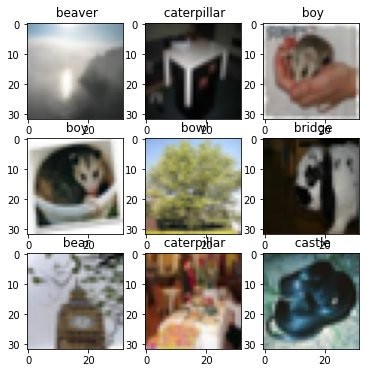

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]


x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]

x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι καθόλου αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά. Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε τα σχετικά λήμματα [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).


# Ερώτημα 1


## Βήμα 1.1: Σχεδίαση Μοντέλων


1.1.  Σχεδίασετε αρχικά τα ακόλουθα μοντέλα:

  1.   **Softmax (baseline)**: FC(200), SOFTMAX

  2.   **MLP**: FC(512), RELU, FC(200), SOFTMAX

  3.   **LeNet**: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX

  4. **CNN1**: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX

  5. **CNN2**: σχεδίαστε την αρχιτεκτονική του και δικού σας μοντέλου 



###**Μοντέλο 1: Softmax (baseline)**


In [ ]:
#Model_1: FC(200), SOFTMAX
model_1 = models.Sequential()
model_1.add(layers.Flatten(input_shape=(32,32,3)))
model_1.add(layers.Dense(200, activation='relu'))
model_1.add(layers.Dense(20, activation='softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 20)                4020      
Total params: 618,620
Trainable params: 618,620
Non-trainable params: 0
_________________________________________________________________


### **Μοντέλο 2: MLP** 

In [ ]:
#Model_2: FC(512), RELU, FC(200), SOFTMAX
model_2 = models.Sequential()
model_2.add(layers.Flatten(input_shape=(32,32,3)))
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dense(200, activation='relu'))
model_2.add(layers.Dense(20, activation='softmax'))

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 200)               102600    
_________________________________________________________________
dense_7 (Dense)              (None, 20)                4020      
Total params: 1,679,996
Trainable params: 1,679,996
Non-trainable params: 0
_________________________________________________________________


### **Μοντέλο 3: LeNet**

In [ ]:
#Model_3: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX
model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Flatten())

model_3.add(layers.Dense(512, activation='relu'))
model_3.add(layers.Dense(200, activation='relu'))
model_3.add(layers.Dense(20, activation='softmax'))

In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               590336    
_________________________________________________________________
dense_9 (Dense)              (None, 200)              

### **Μοντέλο 4: CNN1**




In [ ]:
#Model_4: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX
model_4 = models.Sequential()
model_4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(16, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_4.add(layers.Flatten())
model_4.add(layers.Dense(200, activation='relu'))
model_4.add(layers.Dense(20, activation='softmax'))

In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 200)              

### **Μοντέλο 5: CNN2** 

In [ ]:
model_5 = models.Sequential()
model_5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_5.add(layers.MaxPooling2D((4, 4)))
model_5.add(layers.Flatten())

model_5.add(layers.Dense(400, activation='relu'))
model_5.add(layers.Dense(200, activation='relu'))
model_5.add(layers.Dense(20, activation='softmax'))

model_5.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 400)               230800    
_________________________________________________________________
dense_14 (Dense)             (None, 200)              

## Βήμα 1.2: Μεταγλώτιση - Εκπαίδευση Μοντέλων 

1.2.  Μεταγλωτίστε και εκπαιδεύστε, έπειτα,  όλα τα μοντέλα σας, χρησιμοποιώντας 2 διαφορετικούς (καλύτερους) συνδυασμούς optimizer, loss, metrics και epoch (θα προκύψουν 10 διαφορετικά εκπαιδευμένα μοντέλα, 2 ανά αρχιτεκτονική).

**Σημαντική Σημείωση:** Να σημειωθεί ότι μετά απο κάθε πείραμα, ξαναορίζουμε το μοντέλο μας, μιας και επιθυμούμε η εκπαίδευση να γίνει στο αρχικό δίκτυο (χωρίς βάρη).

### **Μοντέλο 1: Softmax (baseline)**

#### Πείραμα 1

In [ ]:
#1o Πείραμα:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_1_1 = model_1.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 100)

Epoch 1/10
85/85 [==============================] - 1s 13ms/step - loss: 2.8889 - accuracy: 0.1428 - val_loss: 2.6370 - val_accuracy: 0.2020
Epoch 2/10
85/85 [==============================] - 1s 12ms/step - loss: 2.4953 - accuracy: 0.2446 - val_loss: 2.4423 - val_accuracy: 0.2493
Epoch 3/10
85/85 [==============================] - 1s 12ms/step - loss: 2.3912 - accuracy: 0.2754 - val_loss: 2.4061 - val_accuracy: 0.2680
Epoch 4/10
85/85 [==============================] - 1s 10ms/step - loss: 2.3210 - accuracy: 0.2981 - val_loss: 2.3848 - val_accuracy: 0.2813
Epoch 5/10
85/85 [==============================] - 1s 11ms/step - loss: 2.2667 - accuracy: 0.3146 - val_loss: 2.3163 - val_accuracy: 0.3120
Epoch 6/10
85/85 [==============================] - 1s 11ms/step - loss: 2.2361 - accuracy: 0.3259 - val_loss: 2.3285 - val_accuracy: 0.2833
Epoch 7/10
85/85 [==============================] - 1s 11ms/step - loss: 2.2171 - accuracy: 0.3261 - val_loss: 2.3149 - val_accuracy: 0.2980
Epoch 8/10
85

#### Πείραμα 2

In [ ]:
#Model_1: FC(200), SOFTMAX
model_1 = models.Sequential()
model_1.add(layers.Flatten(input_shape=(32,32,3)))
model_1.add(layers.Dense(200, activation='relu'))
model_1.add(layers.Dense(20, activation='softmax'))

In [ ]:
#2o Πείραμα:
model_1.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_1_2 = model_1.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 100)


Epoch 1/10
85/85 [==============================] - 1s 11ms/step - loss: 2.8620 - accuracy: 0.1454 - val_loss: 2.6575 - val_accuracy: 0.1793
Epoch 2/10
85/85 [==============================] - 1s 12ms/step - loss: 2.5607 - accuracy: 0.2298 - val_loss: 2.5027 - val_accuracy: 0.2520
Epoch 3/10
85/85 [==============================] - 1s 11ms/step - loss: 2.4568 - accuracy: 0.2598 - val_loss: 2.4424 - val_accuracy: 0.2573
Epoch 4/10
85/85 [==============================] - 1s 10ms/step - loss: 2.3972 - accuracy: 0.2792 - val_loss: 2.4332 - val_accuracy: 0.2733
Epoch 5/10
85/85 [==============================] - 1s 11ms/step - loss: 2.3503 - accuracy: 0.2982 - val_loss: 2.3681 - val_accuracy: 0.2860
Epoch 6/10
85/85 [==============================] - 1s 12ms/step - loss: 2.3160 - accuracy: 0.2974 - val_loss: 2.3895 - val_accuracy: 0.2673
Epoch 7/10
85/85 [==============================] - 1s 11ms/step - loss: 2.2904 - accuracy: 0.3114 - val_loss: 2.3488 - val_accuracy: 0.2753
Epoch 8/10
85

### **Μοντέλο 2: MLP** 


#### Πείραμα 1

In [ ]:
#1o Πείραμα
model_2.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_2_1 = model_2.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 10)

Epoch 1/10
850/850 [==============================] - 8s 10ms/step - loss: 2.6937 - accuracy: 0.1720 - val_loss: 2.4875 - val_accuracy: 0.2433
Epoch 2/10
850/850 [==============================] - 8s 9ms/step - loss: 2.4135 - accuracy: 0.2562 - val_loss: 2.4090 - val_accuracy: 0.2660
Epoch 3/10
850/850 [==============================] - 8s 9ms/step - loss: 2.3088 - accuracy: 0.2985 - val_loss: 2.3665 - val_accuracy: 0.2680
Epoch 4/10
850/850 [==============================] - 8s 9ms/step - loss: 2.2371 - accuracy: 0.3161 - val_loss: 2.2779 - val_accuracy: 0.3040
Epoch 5/10
850/850 [==============================] - 8s 9ms/step - loss: 2.1656 - accuracy: 0.3345 - val_loss: 2.2267 - val_accuracy: 0.3113
Epoch 6/10
850/850 [==============================] - 9s 11ms/step - loss: 2.1158 - accuracy: 0.3547 - val_loss: 2.2364 - val_accuracy: 0.3020
Epoch 7/10
850/850 [==============================] - 8s 9ms/step - loss: 2.0708 - accuracy: 0.3599 - val_loss: 2.2362 - val_accuracy: 0.3273
Epoc

#### Πείραμα 2

In [ ]:
#Model_2: FC(512), RELU, FC(200), SOFTMAX
model_2 = models.Sequential()
model_2.add(layers.Flatten(input_shape=(32,32,3)))
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dense(200, activation='relu'))
model_2.add(layers.Dense(20, activation='softmax'))

In [ ]:
#2o Πείραμα
model_2.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_2_2 = model_2.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 100)

Epoch 1/10
85/85 [==============================] - 2s 25ms/step - loss: 2.7919 - accuracy: 0.1432 - val_loss: 2.5739 - val_accuracy: 0.2160
Epoch 2/10
85/85 [==============================] - 2s 23ms/step - loss: 2.5053 - accuracy: 0.2256 - val_loss: 2.4866 - val_accuracy: 0.2440
Epoch 3/10
85/85 [==============================] - 2s 22ms/step - loss: 2.4069 - accuracy: 0.2625 - val_loss: 2.4398 - val_accuracy: 0.2633
Epoch 4/10
85/85 [==============================] - 2s 23ms/step - loss: 2.3525 - accuracy: 0.2767 - val_loss: 2.3830 - val_accuracy: 0.2827
Epoch 5/10
85/85 [==============================] - 2s 22ms/step - loss: 2.2918 - accuracy: 0.3006 - val_loss: 2.3757 - val_accuracy: 0.2833
Epoch 6/10
85/85 [==============================] - 2s 23ms/step - loss: 2.2362 - accuracy: 0.3242 - val_loss: 2.3106 - val_accuracy: 0.2907
Epoch 7/10
85/85 [==============================] - 2s 23ms/step - loss: 2.2070 - accuracy: 0.3333 - val_loss: 2.2770 - val_accuracy: 0.2960
Epoch 8/10
85

### **Μοντέλο 3: LeNet**

#### Πείραμα 1

In [ ]:
#1ο Πείραμα
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_3_1 = model_3.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 10)

Epoch 1/10
850/850 [==============================] - 16s 19ms/step - loss: 2.4481 - accuracy: 0.2498 - val_loss: 2.1357 - val_accuracy: 0.3480
Epoch 2/10
850/850 [==============================] - 15s 18ms/step - loss: 1.9751 - accuracy: 0.3972 - val_loss: 1.9866 - val_accuracy: 0.3813
Epoch 3/10
850/850 [==============================] - 15s 18ms/step - loss: 1.6890 - accuracy: 0.4768 - val_loss: 1.8295 - val_accuracy: 0.4360
Epoch 4/10
850/850 [==============================] - 16s 18ms/step - loss: 1.4618 - accuracy: 0.5464 - val_loss: 1.7571 - val_accuracy: 0.4693
Epoch 5/10
850/850 [==============================] - 15s 18ms/step - loss: 1.2034 - accuracy: 0.6173 - val_loss: 1.7933 - val_accuracy: 0.4907
Epoch 6/10
850/850 [==============================] - 15s 18ms/step - loss: 0.9479 - accuracy: 0.6961 - val_loss: 1.8555 - val_accuracy: 0.4927
Epoch 7/10
850/850 [==============================] - 16s 18ms/step - loss: 0.7123 - accuracy: 0.7735 - val_loss: 2.1437 - val_accuracy:

#### Πείραμα 2

In [ ]:
#Model_3: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX
model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Flatten())

model_3.add(layers.Dense(512, activation='relu'))
model_3.add(layers.Dense(200, activation='relu'))
model_3.add(layers.Dense(20, activation='softmax'))

In [ ]:
#2ο Πείραμα
model_3.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_3_2 = model_3.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 10)

Epoch 1/10
850/850 [==============================] - 15s 18ms/step - loss: 2.8318 - accuracy: 0.1179 - val_loss: 2.6521 - val_accuracy: 0.1673
Epoch 2/10
850/850 [==============================] - 15s 17ms/step - loss: 2.5115 - accuracy: 0.2209 - val_loss: 2.4670 - val_accuracy: 0.2553
Epoch 3/10
850/850 [==============================] - 14s 17ms/step - loss: 2.3404 - accuracy: 0.2800 - val_loss: 2.3177 - val_accuracy: 0.2873
Epoch 4/10
850/850 [==============================] - 15s 17ms/step - loss: 2.2251 - accuracy: 0.3181 - val_loss: 2.1876 - val_accuracy: 0.3260
Epoch 5/10
850/850 [==============================] - 15s 17ms/step - loss: 2.1037 - accuracy: 0.3573 - val_loss: 2.1839 - val_accuracy: 0.3280
Epoch 6/10
850/850 [==============================] - 16s 18ms/step - loss: 1.9951 - accuracy: 0.3901 - val_loss: 2.0032 - val_accuracy: 0.3953
Epoch 7/10
850/850 [==============================] - 15s 17ms/step - loss: 1.8847 - accuracy: 0.4232 - val_loss: 2.0157 - val_accuracy:

### **Μοντέλο 4: CNN1**

#### Πείραμα 1

In [ ]:
#1ο Πείραμα
model_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_4_1 = model_4.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 100)

Epoch 1/10
85/85 [==============================] - 7s 84ms/step - loss: 2.7714 - accuracy: 0.1338 - val_loss: 2.5515 - val_accuracy: 0.2280
Epoch 2/10
85/85 [==============================] - 7s 83ms/step - loss: 2.3916 - accuracy: 0.2645 - val_loss: 2.3030 - val_accuracy: 0.2987
Epoch 3/10
85/85 [==============================] - 7s 83ms/step - loss: 2.2159 - accuracy: 0.3286 - val_loss: 2.2129 - val_accuracy: 0.3113
Epoch 4/10
85/85 [==============================] - 7s 84ms/step - loss: 2.0664 - accuracy: 0.3747 - val_loss: 2.0438 - val_accuracy: 0.3773
Epoch 5/10
85/85 [==============================] - 7s 83ms/step - loss: 1.9653 - accuracy: 0.4028 - val_loss: 2.0145 - val_accuracy: 0.3807
Epoch 6/10
85/85 [==============================] - 7s 83ms/step - loss: 1.8680 - accuracy: 0.4318 - val_loss: 2.0320 - val_accuracy: 0.3733
Epoch 7/10
85/85 [==============================] - 7s 84ms/step - loss: 1.7918 - accuracy: 0.4511 - val_loss: 1.8928 - val_accuracy: 0.4153
Epoch 8/10
85

#### Πείραμα 2

In [ ]:
#Model_4: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX
model_4 = models.Sequential()
model_4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(16, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_4.add(layers.Flatten())
model_4.add(layers.Dense(200, activation='relu'))
model_4.add(layers.Dense(20, activation='softmax'))

In [ ]:
#2ο Πείραμα
model_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_4_2 = model_4.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 100)

Epoch 1/10
85/85 [==============================] - 7s 83ms/step - loss: 2.6995 - accuracy: 0.1621 - val_loss: 2.5573 - val_accuracy: 0.2227
Epoch 2/10
85/85 [==============================] - 7s 84ms/step - loss: 2.3982 - accuracy: 0.2672 - val_loss: 2.3836 - val_accuracy: 0.2713
Epoch 3/10
85/85 [==============================] - 7s 83ms/step - loss: 2.2501 - accuracy: 0.3155 - val_loss: 2.2375 - val_accuracy: 0.3200
Epoch 4/10
85/85 [==============================] - 7s 83ms/step - loss: 2.1270 - accuracy: 0.3547 - val_loss: 2.1672 - val_accuracy: 0.3487
Epoch 5/10
85/85 [==============================] - 7s 83ms/step - loss: 2.0303 - accuracy: 0.3832 - val_loss: 2.0721 - val_accuracy: 0.3693
Epoch 6/10
85/85 [==============================] - 7s 84ms/step - loss: 1.9461 - accuracy: 0.4065 - val_loss: 1.9793 - val_accuracy: 0.4007
Epoch 7/10
85/85 [==============================] - 7s 84ms/step - loss: 1.8653 - accuracy: 0.4313 - val_loss: 1.9199 - val_accuracy: 0.4180
Epoch 8/10
85

### **Μοντέλο 5: CNN2** 

#### Πείραμα 1

In [ ]:
model_5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_5_1 = model_5.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 10)

Epoch 1/10
850/850 [==============================] - 15s 18ms/step - loss: 2.5033 - accuracy: 0.2241 - val_loss: 2.2802 - val_accuracy: 0.3040
Epoch 2/10
850/850 [==============================] - 15s 17ms/step - loss: 2.0160 - accuracy: 0.3822 - val_loss: 1.8505 - val_accuracy: 0.4207
Epoch 3/10
850/850 [==============================] - 15s 17ms/step - loss: 1.7194 - accuracy: 0.4696 - val_loss: 1.7751 - val_accuracy: 0.4613
Epoch 4/10
850/850 [==============================] - 14s 17ms/step - loss: 1.5058 - accuracy: 0.5359 - val_loss: 1.7119 - val_accuracy: 0.4660
Epoch 5/10
850/850 [==============================] - 14s 17ms/step - loss: 1.3435 - accuracy: 0.5807 - val_loss: 1.6493 - val_accuracy: 0.4907
Epoch 6/10
850/850 [==============================] - 15s 17ms/step - loss: 1.1787 - accuracy: 0.6314 - val_loss: 1.6749 - val_accuracy: 0.4993
Epoch 7/10
850/850 [==============================] - 14s 17ms/step - loss: 1.0210 - accuracy: 0.6708 - val_loss: 1.8636 - val_accuracy:

#### Πείραμα 2

In [ ]:
model_5 = models.Sequential()
model_5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_5.add(layers.MaxPooling2D((4, 4)))
model_5.add(layers.Flatten())

model_5.add(layers.Dense(400, activation='relu'))
model_5.add(layers.Dense(200, activation='relu'))
model_5.add(layers.Dense(20, activation='softmax'))

In [ ]:
model_5.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_5_2 = model_5.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 10)

Epoch 1/10
850/850 [==============================] - 16s 19ms/step - loss: 2.9098 - accuracy: 0.1081 - val_loss: 2.7361 - val_accuracy: 0.1640
Epoch 2/10
850/850 [==============================] - 14s 17ms/step - loss: 2.5905 - accuracy: 0.1968 - val_loss: 2.5146 - val_accuracy: 0.2400
Epoch 3/10
850/850 [==============================] - 14s 17ms/step - loss: 2.4072 - accuracy: 0.2573 - val_loss: 2.3612 - val_accuracy: 0.2620
Epoch 4/10
850/850 [==============================] - 14s 17ms/step - loss: 2.2520 - accuracy: 0.3058 - val_loss: 2.2302 - val_accuracy: 0.3087
Epoch 5/10
850/850 [==============================] - 15s 17ms/step - loss: 2.1255 - accuracy: 0.3482 - val_loss: 2.0963 - val_accuracy: 0.3540
Epoch 6/10
850/850 [==============================] - 15s 17ms/step - loss: 2.0143 - accuracy: 0.3809 - val_loss: 2.0128 - val_accuracy: 0.3860
Epoch 7/10
850/850 [==============================] - 14s 16ms/step - loss: 1.9259 - accuracy: 0.4118 - val_loss: 1.9724 - val_accuracy:

## Βήμα 2: Aξιολόγηση των μοντέλων

---
2.1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ακρίβεια εκπαίδευσης και την ακρίβεια επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1.2 (10 διαγράμματα) και επιλέξτε αυτό με την καλύτερη ακρίβεια από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 5).

---

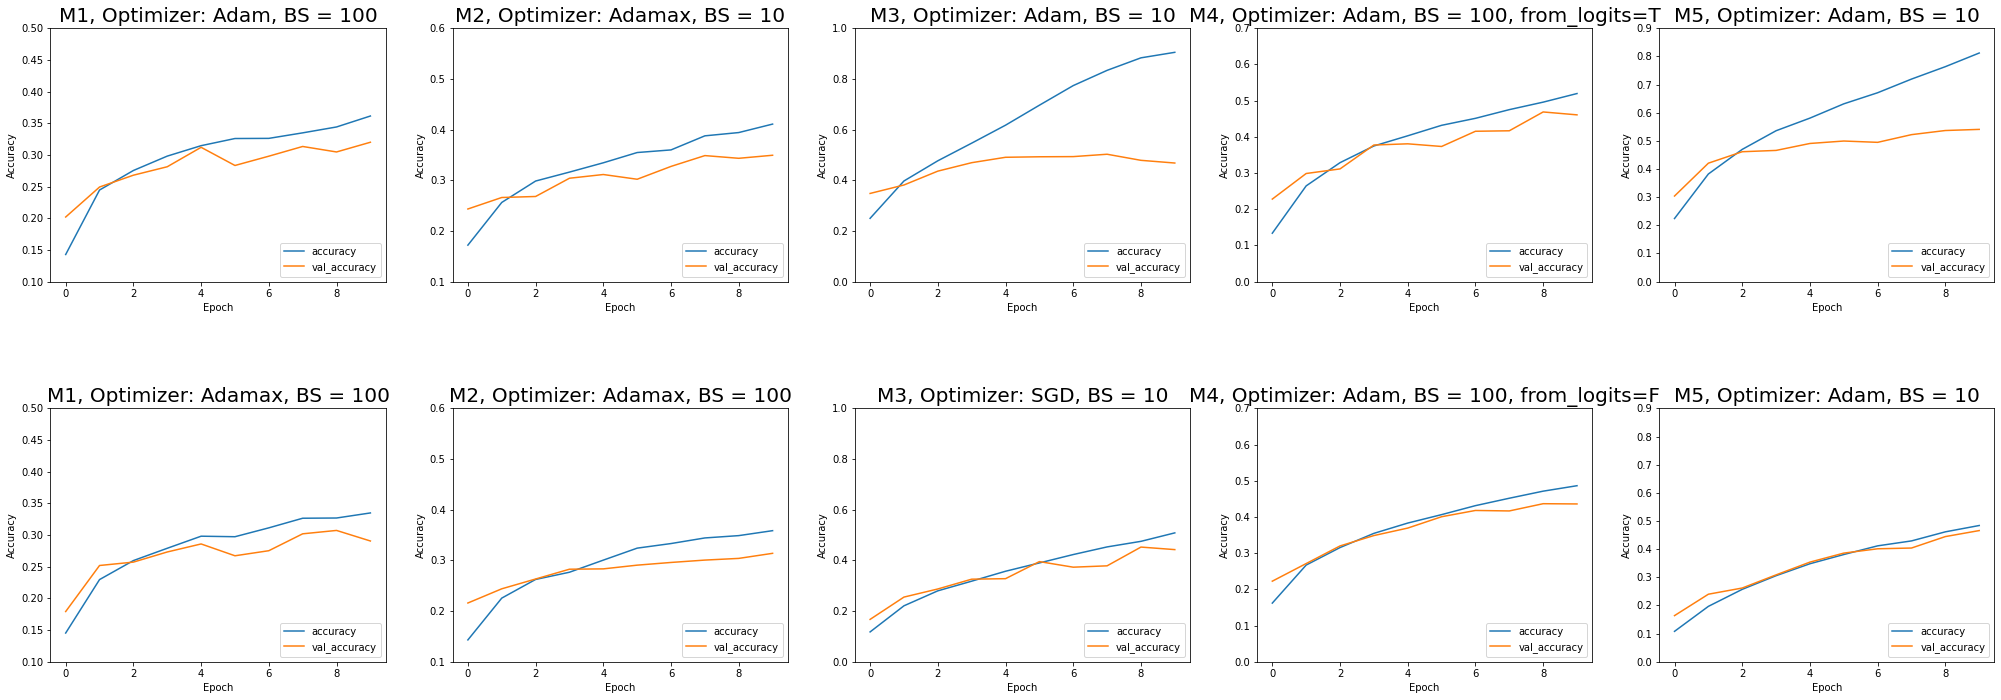

In [ ]:
plt.figure(figsize=(30, 10))

###################### 1st ROW #####################################
plt.subplot(2, 5, 1)
plt.plot(history_1_1.history['accuracy'], label='accuracy')
plt.plot(history_1_1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 0.5])
plt.legend(loc='lower right')
plt.title("M1, Optimizer: Adam, BS = 100",size=20)

plt.subplot(2, 5, 2)
plt.plot(history_2_1.history['accuracy'], label='accuracy')
plt.plot(history_2_1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 0.6])
plt.legend(loc='lower right')
plt.title("M2, Optimizer: Adamax, BS = 10",size=20)

plt.subplot(2, 5, 3)
plt.plot(history_3_1.history['accuracy'], label='accuracy')
plt.plot(history_3_1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title("M3, Optimizer: Adam, BS = 10",size=20)

plt.subplot(2, 5, 4)
plt.plot(history_4_1.history['accuracy'], label='accuracy')
plt.plot(history_4_1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.7])
plt.legend(loc='lower right')
plt.title("M4, Optimizer: Adam, BS = 100, from_logits=T",size=20)

plt.subplot(2, 5, 5)
plt.plot(history_5_1.history['accuracy'], label='accuracy')
plt.plot(history_5_1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.9])
plt.legend(loc='lower right')
plt.title("M5, Optimizer: Adam, BS = 10",size=20)

###################### 2nd ROW ####################################

plt.subplot(2, 5, 6)
plt.plot(history_1_2.history['accuracy'], label='accuracy')
plt.plot(history_1_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 0.5])
plt.legend(loc='lower right')
plt.title("M1, Optimizer: Adamax, BS = 100",size=20)

plt.subplot(2, 5, 7)
plt.plot(history_2_2.history['accuracy'], label='accuracy')
plt.plot(history_2_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 0.6])
plt.legend(loc='lower right')
plt.title("M2, Optimizer: Adamax, BS = 100",size=20)

plt.subplot(2, 5, 8)
plt.plot(history_3_2.history['accuracy'], label='accuracy')
plt.plot(history_3_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title("M3, Optimizer: SGD, BS = 10",size=20)

plt.subplot(2, 5, 9)
plt.plot(history_4_2.history['accuracy'], label='accuracy')
plt.plot(history_4_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.7])
plt.legend(loc='lower right')
plt.title("M4, Optimizer: Adam, BS = 100, from_logits=F",size=20)

plt.subplot(2, 5, 10)
plt.plot(history_5_2.history['accuracy'], label='accuracy')
plt.plot(history_5_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,0.9])
plt.legend(loc='lower right')
plt.title("M5, Optimizer: Adam, BS = 10",size=20)

plt.subplots_adjust(left=0, bottom=0, right=None, top= None, wspace=0.2, hspace=0.5)



---
2.2. Για κάθε ένα από τα μοντέλα με την καλύτερη ακρίβεια(συνολικά 5), απεικονίστε σε κοινό διάγραμμα την ακρίβεια εκπαίδευσης και την ακρίβεια επικύρωσης στο σύνολο των εποχών.


In [ ]:
best_for_m1 = history_1_1
best_for_m2 = history_2_1
best_for_m3 = history_3_2
best_for_m4 = history_4_2
best_for_m5 = history_5_2

Στο παράκάτω διάγραμμα, με **διακκεκομένες** γραμμές απεικονίζουμε το *train_accuracy*, ενώ με **συνεχείς** το val_accuracy. Για κάθε μοντέλο έχουμε και διαφορετικό χρώμα.


Text(0.5, 1.0, 'Best Combinations for 5 Models')

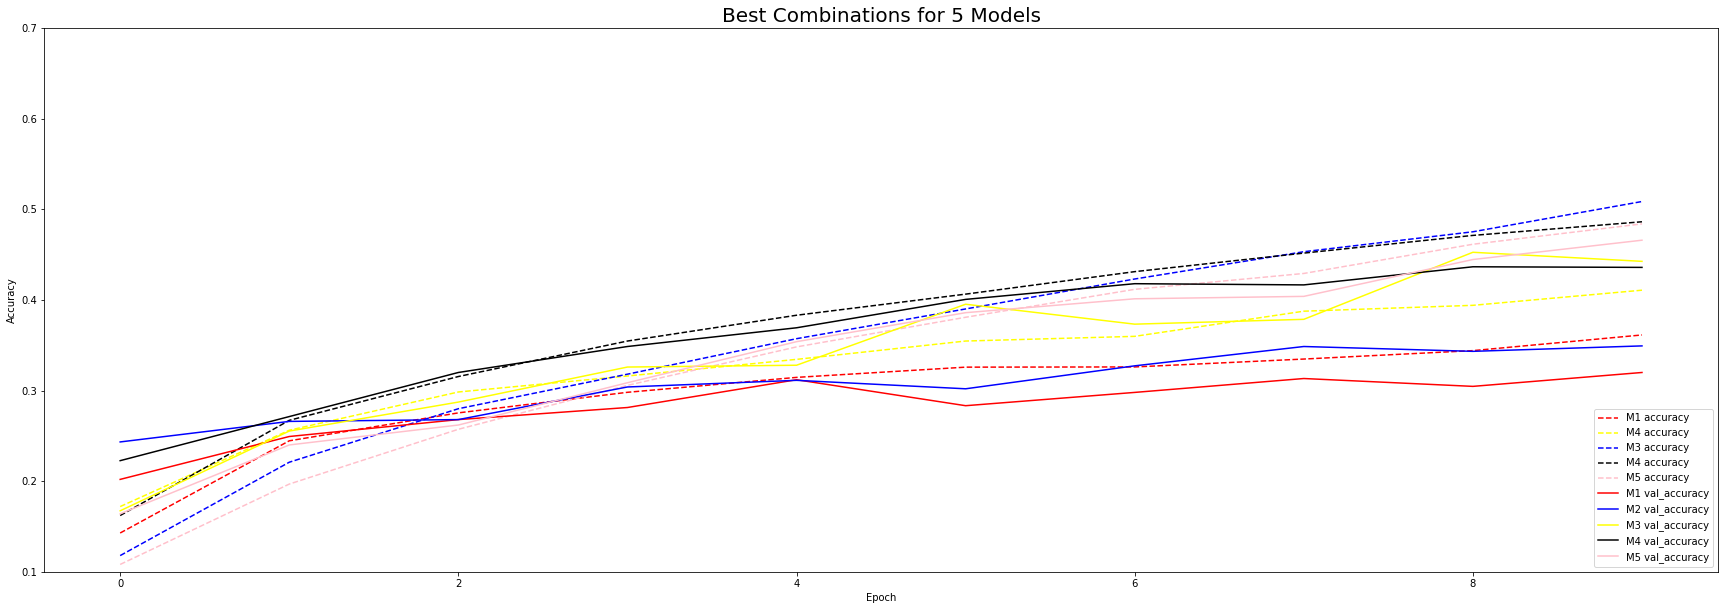

In [ ]:
plt.figure(figsize=(30, 10))

plt.plot(best_for_m1.history['accuracy'],'--',color = "red",label='M1 accuracy')
plt.plot(best_for_m2.history['accuracy'],'--',color = "yellow", label='M4 accuracy')
plt.plot(best_for_m3.history['accuracy'],'--',color = "blue",  label='M3 accuracy')
plt.plot(best_for_m4.history['accuracy'],'--',color = "black", label='M4 accuracy')
plt.plot(best_for_m5.history['accuracy'],'--',color = "pink",  label='M5 accuracy')


plt.plot(best_for_m1.history['val_accuracy'],color = "red", label = 'M1 val_accuracy')
plt.plot(best_for_m2.history['val_accuracy'],color = "blue", label = 'M2 val_accuracy')
plt.plot(best_for_m3.history['val_accuracy'],color = "yellow", label = 'M3 val_accuracy')
plt.plot(best_for_m4.history['val_accuracy'],color = "black", label = 'M4 val_accuracy')
plt.plot(best_for_m5.history['val_accuracy'],color = "pink", label = 'M5 val_accuracy')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 0.7])
plt.legend(loc='lower right')
plt.title("Best Combinations for 5 Models",size=20)

 ---
 2.3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:

 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)

---
 




1.   Πλήθος Δεδομένων - Κλάσεων: <br> <br> 
Σχετικά με το **πλήθος των δεδομένων** εύκολα παρατηρεί κανείς ότι, όσο πιο πολλά δεδομένα έχουμε στη διάθεσή μας, τόσο μεγαλύτερη ακρίβεια εξασφαλίζουμε. Στην περίπτωση που είχαμε λίγα δεδομένα, το νευρωνικό πετύχαινε αρκετά μεγάλο train_accuracy, αλλά δεν μπορούσε να γενικεύσει( γεγονός που αποτυπώθηκε στο χαμηλό val_acc). 
<br> <br> 
Σχετικά με το **πλήθος των κλάσεων**, διαπιστώσαμε ότι όσο μεγαλώναμε τον αριθμό των κλάσεων η ακρίβεια μειωνόταν κατά κάποιο τρόπο. Αυτό συνέβαινε μιας και κάποιες "νέες" κλάσεις που προσθέταμε, είχαν εικόνες με κοινά χαρακτηριστικά με κάποιες άλλες κλάσσεις( π.χ στις 20 κλάσεις είχαμε μόνο λιοντάρια, ενώ στις 80 προστέθηκαν και κλάσεις με λεοπαρδάλεις η τίγρεις). Έτσι αυξήθηκε ο αριθμός των σφαλμάτων 
<br> <br>  
2.   Optimizers : <br> <br> 
Όσον αφορά τους optimizers, επιλέξαμε να μελέτήσουμε τους Adam,Adamax,SGD. Θα τους συγκρίνουμε χρησιμοποιώντας δύο μετρικές.1) Ταχύτητα Εκπαίδευσης, 2) Ικανότητα Γενίκευσης. Οπως παρατηρεί κανείς απο την πρώτη στήλη των subplots, ο **Adam** πετυχαίνει σχεδίον το ίδιο val_accuracy με τον **Adamax**. H μόνη διαφορά που μπορούμε να παρατηρήσουμε είναι ότι στον Adamax η γραφική δεν παρουσιάζει απότομες αλλαγές και είναι πιο smooth. Aπο την άλλη, παρατηρώντας την τρίτη στήλη των γραφικών, διαπιστώνουμε ότι ο **Adam** πετυχαίνει σχεδόν 100% train accuracy(για μικρό Batch size) και το ίδιο val_accuraccy με τον Adam. Βέβαια όμως ο Adam πέτυχε τα αποτελέσματα αυτά σε λιγότερο χρόνο συγκριτικά με SGD
<br> <br> 
3.   Επίδραση Batch Size:<br> <br>
 Οφείλουμε να παραδεχτούμε ότι όσο μικρότερο είναι το batch_size, τόσο μικρότερες είναι και οι απαιτήσεις σε μνήμη. Ταυτόχρονα με **μικρά** batch_sizes, πετυχαίνουμε υψηλές ταχύτητες. Απο την άλλη, **μεγάλα** batches, εγγυώνται και μεγαλύτερο accuracy, καθώς σε ένα iteration το νευρωνικό μας τροφοδοτείται με περισσόότερα δεδομένα. Kάτι τέτοιο φαίνεται και απο τη 2η Στήλη των γραφικών, όπου πειραματιζόμαστε με διαφορετικό batch size και τον ίδιο optimizer 



## Βήμα 3: Aξιολόγηση Ακρίβειας για test-set

---
Αξιολογήστε την ακρίβεια για το test set σας.

In [ ]:
test_loss1, test_acc1 = model_1.evaluate(x_test,  y_test, verbose=2)
test_loss2, test_acc2 = model_2.evaluate(x_test,  y_test, verbose=2)
test_loss3, test_acc3 = model_3.evaluate(x_test,  y_test, verbose=2)
test_loss4, test_acc4 = model_4.evaluate(x_test,  y_test, verbose=2)
test_loss5, test_acc5 = model_5.evaluate(x_test,  y_test, verbose=2)

#print('\nTest accuracy:', test_acc1)
#print('\nTest accuracy:', test_acc2)
#print('\nTest accuracy:', test_acc3)
#print('\nTest accuracy:', test_acc4)
#print('\nTest accuracy:', test_acc5)



63/63 - 0s - loss: 2.3293 - accuracy: 0.2955
63/63 - 0s - loss: 2.2442 - accuracy: 0.3270
63/63 - 1s - loss: 1.8689 - accuracy: 0.4395
63/63 - 1s - loss: 1.8701 - accuracy: 0.4325
63/63 - 1s - loss: 1.8415 - accuracy: 0.4495


**ΠΑΡΑΤΗΡΗΣΕΙΣ:** Παρατηρούμε γενικά ότι το μικρότερο test_acc σημειώνεται για το Μοντέλο 1, ενώ όσο το Μοντέλο γίνεται πιο σύνθετο, (M2,M3..) το test_acc αυξάνεται. Ωστόσο το γεγονός ότι έχουμε σχετικά μικρό test_acc  είναι σημάδι overfitt (Το δίκτυο μας εκπαιδεύτηκε καλά στα train δεδομένα, αλλά δεν κατάφερε να γενικεύσει). Θα δούμε πως μπορούμε να μειώσουμε overfitt

# Ερώτημα 2

**Προσοχή** 

Για τα επόμενα ερωτήματα θα κρατήσετε το μοντέλο που αντιστοιχεί στον καλύτερο συνδυασμό ( optimizer, loss, metrics και epoch) από τα μοντέλα που εκπαιδεύσατε (και για τα 5 μοντέλα - όπως στο Ερώτημα 1, βήμα 2.2).


### Βήμα 1: Έλεγχος υπερεκπαίδευσης

  1.1. Προτείνετε τεχνικές που θα χρησιμοποιήσετε για να αντιμετωπίσετε το πρόβλημα της υπερεκπαίδεσης και υλοποιήστε τις τεχνικές που προτείνετε για την εκπαίδευση του μοντέλου ώστε αυτό να γενικεύει καλύτερα.

Δοκιμάστε διάφορους τρόπους για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως:

- Πρόωρος τερματισμός (early stopping). Μια μέθοδος που τερματίζει την εκπαίδευση αν δεν υπάρχει βελτίωση ως προς τη μετρική απόδοσης που παρακολουθούμε. [tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStoppinghttps://)

- Dropout. Μια άλλη τεχνική για τη μείωση της υπερεκπαίδευσης είναι το Dropout. Είναι ένα είδος ομαλοποίησης (regularization) που επιβάλλει στα βάρη του δικτύου να παίρνουν μόνο μικρές τιμές. Εάν εφαρμόσουε dropout σε ένα επίπεδο του δικτύου, τότε ένα ποσοστό των βαρών του γίνεται τυχαία μηδενικό κατά την εκπαίδευση. [Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout)

- Επαύξηση δεδομένων. Η υπερεκπαίδευση συνήθως συμβαίνει όταν έχουμε λίγα ή/και πολύ όμοια δεδομένα εκπαίδευσης. Ένας τρόπος να διορθωθεί αυτό το πρόβλημα είναι να αυξήσουμε τα δεδομένα (data augmentation). Το data augmentation δημιουργεί νέα δεδομένα εκπαίδευσης με βάση τα υπάρχοντα εφαρμόζοντας τυχαίους μετασχηματισμούς ώστε να προκύπτουν αληθοφανείς εικόνες. [Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)



#### Early Stopping

Για να έχει νόημα η τεχνική "Early Stopping", διπλασιάζουμε τον αριθμό των εποχών, και βλέπουμε(εκτυπώνουμε) στις πόσες σταμάτησε το training.Επίσης αρχικοποιούμε ξανά το δίκτυο μας ορίζοντάς το κατά τα γνωστα.

In [ ]:
#Early Stoping 
epochs = 10
increased_epochs = epochs*2

tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

**Μοντέλο 1 (Kαλύτερος Συνδυασμός)**

In [ ]:
#Model_1: FC(200), SOFTMAX
model_1 = models.Sequential()
model_1.add(layers.Flatten(input_shape=(32,32,3)))
model_1.add(layers.Dense(200, activation='relu'))
model_1.add(layers.Dense(20, activation='softmax'))

#Compile
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
#Μοντέλο 1
history_m1 = model_1.fit(x_train, y_train, epochs=increased_epochs, 
                    validation_data=(x_val, y_val),batch_size = 100,callbacks=[callback])

print(len(history_m1.history['loss']),"epochs are run out of", increased_epochs)

Epoch 1/20
85/85 [==============================] - 1s 11ms/step - loss: 2.8369 - accuracy: 0.1464 - val_loss: 2.5797 - val_accuracy: 0.2040
Epoch 2/20
85/85 [==============================] - 1s 11ms/step - loss: 2.4941 - accuracy: 0.2358 - val_loss: 2.4744 - val_accuracy: 0.2327
Epoch 3/20
85/85 [==============================] - 1s 10ms/step - loss: 2.4300 - accuracy: 0.2508 - val_loss: 2.4559 - val_accuracy: 0.2427
Epoch 4/20
85/85 [==============================] - 1s 10ms/step - loss: 2.3464 - accuracy: 0.2874 - val_loss: 2.3767 - val_accuracy: 0.2613
Epoch 5/20
85/85 [==============================] - 1s 10ms/step - loss: 2.2901 - accuracy: 0.3006 - val_loss: 2.3377 - val_accuracy: 0.2773
Epoch 6/20
85/85 [==============================] - 1s 10ms/step - loss: 2.2697 - accuracy: 0.3081 - val_loss: 2.3324 - val_accuracy: 0.2827
Epoch 7/20
85/85 [==============================] - 1s 11ms/step - loss: 2.2356 - accuracy: 0.3234 - val_loss: 2.3160 - val_accuracy: 0.2907
Epoch 8/20
85

**Μοντέλο 2 (Kαλύτερος Συνδυασμός)**

In [ ]:
#Model_2: FC(512), RELU, FC(200), SOFTMAX
model_2 = models.Sequential()
model_2.add(layers.Flatten(input_shape=(32,32,3)))
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dense(200, activation='relu'))
model_2.add(layers.Dense(20, activation='softmax'))

#Compile
model_2.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
#Μοντέλο 2
history_m2 = model_2.fit(x_train, y_train, epochs=increased_epochs, 
                    validation_data=(x_val, y_val),batch_size = 100,callbacks=[callback])

print(len(history_m2.history['loss']),"epochs are run out of", increased_epochs)

Epoch 1/20
85/85 [==============================] - 2s 27ms/step - loss: 2.7400 - accuracy: 0.1682 - val_loss: 2.6294 - val_accuracy: 0.1973
Epoch 2/20
85/85 [==============================] - 2s 23ms/step - loss: 2.4768 - accuracy: 0.2433 - val_loss: 2.4741 - val_accuracy: 0.2460
Epoch 3/20
85/85 [==============================] - 2s 23ms/step - loss: 2.3712 - accuracy: 0.2768 - val_loss: 2.3950 - val_accuracy: 0.2880
Epoch 4/20
85/85 [==============================] - 2s 22ms/step - loss: 2.2940 - accuracy: 0.3020 - val_loss: 2.3322 - val_accuracy: 0.2967
Epoch 5/20
85/85 [==============================] - 2s 23ms/step - loss: 2.2501 - accuracy: 0.3201 - val_loss: 2.3062 - val_accuracy: 0.2913
Epoch 6/20
85/85 [==============================] - 2s 22ms/step - loss: 2.1992 - accuracy: 0.3309 - val_loss: 2.2815 - val_accuracy: 0.3100
Epoch 7/20
85/85 [==============================] - 2s 22ms/step - loss: 2.1564 - accuracy: 0.3521 - val_loss: 2.2586 - val_accuracy: 0.3133
Epoch 8/20
85

**Μοντέλο 3 (Kαλύτερος Συνδυασμός)**

In [ ]:
#Model_3: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX
model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Flatten())

model_3.add(layers.Dense(512, activation='relu'))
model_3.add(layers.Dense(200, activation='relu'))
model_3.add(layers.Dense(20, activation='softmax'))

#Compile

model_3.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [ ]:
#Μοντέλο 3
history_m3 = model_3.fit(x_train, y_train, epochs=increased_epochs, 
                    validation_data=(x_val, y_val),batch_size = 100,callbacks=[callback])

print(len(history_m3.history['loss']),"epochs are run out of", increased_epochs)

Epoch 1/20
85/85 [==============================] - 9s 102ms/step - loss: 2.9894 - accuracy: 0.0701 - val_loss: 2.9842 - val_accuracy: 0.0940
Epoch 2/20
85/85 [==============================] - 8s 98ms/step - loss: 2.9709 - accuracy: 0.1041 - val_loss: 2.9652 - val_accuracy: 0.0787
Epoch 3/20
85/85 [==============================] - 8s 98ms/step - loss: 2.9427 - accuracy: 0.0991 - val_loss: 2.9290 - val_accuracy: 0.1167
Epoch 4/20
85/85 [==============================] - 8s 98ms/step - loss: 2.8830 - accuracy: 0.1331 - val_loss: 2.8492 - val_accuracy: 0.1380
Epoch 5/20
85/85 [==============================] - 8s 98ms/step - loss: 2.7636 - accuracy: 0.1689 - val_loss: 2.7117 - val_accuracy: 0.2047
Epoch 6/20
85/85 [==============================] - 12s 138ms/step - loss: 2.6315 - accuracy: 0.1994 - val_loss: 2.6143 - val_accuracy: 0.2107
Epoch 7/20
85/85 [==============================] - 8s 100ms/step - loss: 2.5664 - accuracy: 0.2136 - val_loss: 2.5600 - val_accuracy: 0.2220
Epoch 8/2

**Μοντέλο 4 (Kαλύτερος Συνδυασμός)**

In [ ]:
#Model_4: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX
model_4 = models.Sequential()
model_4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(16, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_4.add(layers.Flatten())
model_4.add(layers.Dense(200, activation='relu'))
model_4.add(layers.Dense(20, activation='softmax'))

#Compile

model_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
#Μοντέλο 4
history_m4 = model_4.fit(x_train, y_train, epochs=increased_epochs, 
                    validation_data=(x_val, y_val),batch_size = 100,callbacks=[callback])

print(len(history_m4.history['loss']),"epochs are run out of", increased_epochs)

Epoch 1/20
85/85 [==============================] - 7s 86ms/step - loss: 2.7125 - accuracy: 0.1589 - val_loss: 2.4876 - val_accuracy: 0.2513
Epoch 2/20
85/85 [==============================] - 7s 85ms/step - loss: 2.3622 - accuracy: 0.2786 - val_loss: 2.3193 - val_accuracy: 0.2840
Epoch 3/20
85/85 [==============================] - 7s 86ms/step - loss: 2.1885 - accuracy: 0.3301 - val_loss: 2.1832 - val_accuracy: 0.3320
Epoch 4/20
85/85 [==============================] - 7s 84ms/step - loss: 2.0782 - accuracy: 0.3664 - val_loss: 2.0675 - val_accuracy: 0.3687
Epoch 5/20
85/85 [==============================] - 7s 84ms/step - loss: 2.0032 - accuracy: 0.3938 - val_loss: 2.0571 - val_accuracy: 0.3660
Epoch 6/20
85/85 [==============================] - 7s 84ms/step - loss: 1.9271 - accuracy: 0.4085 - val_loss: 2.0449 - val_accuracy: 0.3527
Epoch 7/20
85/85 [==============================] - 7s 84ms/step - loss: 1.8599 - accuracy: 0.4267 - val_loss: 1.9501 - val_accuracy: 0.3960
Epoch 8/20
85

**Μοντέλο 5 (Kαλύτερος Συνδυασμός)**

In [ ]:
model_5 = models.Sequential()
model_5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_5.add(layers.MaxPooling2D((4, 4)))
model_5.add(layers.Flatten())

model_5.add(layers.Dense(400, activation='relu'))
model_5.add(layers.Dense(200, activation='relu'))
model_5.add(layers.Dense(20, activation='softmax'))

#Compile

model_5.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 400)               230800    
_________________________________________________________________
dense_14 (Dense)             (None, 200)              

In [ ]:
#Μοντέλο 5
history_m5 = model_5.fit(x_train, y_train, epochs=increased_epochs, 
                    validation_data=(x_val, y_val),batch_size = 100,callbacks=[callback])

print(len(history_1_1.history['loss']),"epochs are run out of", increased_epochs)

Epoch 1/20
85/85 [==============================] - 10s 121ms/step - loss: 0.1302 - accuracy: 0.9681 - val_loss: 2.5262 - val_accuracy: 0.5607
Epoch 2/20
85/85 [==============================] - 10s 113ms/step - loss: 0.1193 - accuracy: 0.9718 - val_loss: 2.5478 - val_accuracy: 0.5613
Epoch 3/20
85/85 [==============================] - 10s 115ms/step - loss: 0.1165 - accuracy: 0.9722 - val_loss: 2.5550 - val_accuracy: 0.5647
Epoch 4/20
85/85 [==============================] - 10s 112ms/step - loss: 0.1129 - accuracy: 0.9742 - val_loss: 2.5708 - val_accuracy: 0.5640
Epoch 5/20
85/85 [==============================] - 10s 113ms/step - loss: 0.1106 - accuracy: 0.9758 - val_loss: 2.5972 - val_accuracy: 0.5620
Epoch 6/20
85/85 [==============================] - 10s 112ms/step - loss: 0.1081 - accuracy: 0.9774 - val_loss: 2.6078 - val_accuracy: 0.5600
Epoch 7/20
85/85 [==============================] - 9s 111ms/step - loss: 0.1063 - accuracy: 0.9772 - val_loss: 2.6280 - val_accuracy: 0.5587


**ΠΑΡΑΤΗΡΗΣΕΙΣ:** Παρατηρήσαμε ότι όταν αυξάναμε κατά πολύ τον αριθμό τω εποχών (>100) , η διαδικασία της εκπαίδευσης τερμάτιζε (κάπου στις 60 εποχές). Κάτι τέτοιο ήταν αναμενόμενο αφού το loss δεν μπορούσε να μειωθεί άλλο.

#### Dropout

**Προσθήκη Επιπέδου Dropout σε όλα τα Μοντέλα.**

In [ ]:
#Model_1: FC(200), SOFTMAX
model_1 = models.Sequential()
model_1.add(layers.Flatten(input_shape=(32,32,3)))
model_1.add(layers.Dense(200, activation='relu'))
model_1.add(layers.Dropout(0.2))                          # new !
model_1.add(layers.Dense(20, activation='softmax'))


#Model_2: FC(512), RELU, FC(200), SOFTMAX
model_2 = models.Sequential()
model_2.add(layers.Flatten(input_shape=(32,32,3)))
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dense(200, activation='relu'))
model_2.add(layers.Dropout(0.2))                          # new !
model_2.add(layers.Dense(20, activation='softmax'))

#Model_3: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX
model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Dropout(0.2))                          # new !
model_3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Dropout(0.2))                          # new !

model_3.add(layers.Flatten())

model_3.add(layers.Dense(512, activation='relu'))
model_3.add(layers.Dense(200, activation='relu'))
model_3.add(layers.Dense(20, activation='softmax'))

#Model_4: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX
model_4 = models.Sequential()
model_4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Dropout(0.2))                          # new !
model_4.add(layers.Conv2D(16, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Dropout(0.2))                          # new !

model_4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_4.add(layers.Flatten())
model_4.add(layers.Dense(200, activation='relu'))
model_4.add(layers.Dense(20, activation='softmax'))

#Μodel_5 (my CNN)
model_5 = models.Sequential()
model_5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Dropout(0.2))                          # new !
model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_5.add(layers.MaxPooling2D((4, 4)))
model_5.add(layers.Dropout(0.2))                          # new !
model_5.add(layers.Flatten())

model_5.add(layers.Dense(400, activation='relu'))
model_5.add(layers.Dense(200, activation='relu'))
model_5.add(layers.Dense(20, activation='softmax'))



Παρουσίαση των Μοντέλων

In [ ]:
model_1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 200)               614600    
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 20)                4020      
Total params: 618,620
Trainable params: 618,620
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_44 (Dense)             (None, 200)               102600    
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 20)                4020      
Total params: 1,679,996
Trainable params: 1,679,996
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 1152)            

In [ ]:
model_4.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 16)        4624      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 32)        

In [ ]:
model_5.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 576)             

**Μεταγλώττιση με τον Καλύτερο Συνδυασμό**

In [ ]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_1_1_dp = model_1.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 100)

Epoch 1/10
85/85 [==============================] - 1s 12ms/step - loss: 2.8971 - accuracy: 0.1178 - val_loss: 2.6840 - val_accuracy: 0.1600
Epoch 2/10
85/85 [==============================] - 1s 12ms/step - loss: 2.6580 - accuracy: 0.1688 - val_loss: 2.5767 - val_accuracy: 0.1887
Epoch 3/10
85/85 [==============================] - 1s 12ms/step - loss: 2.5843 - accuracy: 0.1940 - val_loss: 2.5064 - val_accuracy: 0.2340
Epoch 4/10
85/85 [==============================] - 1s 13ms/step - loss: 2.5400 - accuracy: 0.2042 - val_loss: 2.4770 - val_accuracy: 0.2480
Epoch 5/10
85/85 [==============================] - 1s 11ms/step - loss: 2.4897 - accuracy: 0.2256 - val_loss: 2.4188 - val_accuracy: 0.2580
Epoch 6/10
85/85 [==============================] - 1s 11ms/step - loss: 2.4641 - accuracy: 0.2345 - val_loss: 2.4181 - val_accuracy: 0.2660
Epoch 7/10
85/85 [==============================] - 1s 11ms/step - loss: 2.4495 - accuracy: 0.2351 - val_loss: 2.4304 - val_accuracy: 0.2667
Epoch 8/10
85

In [ ]:
model_2.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_2_1_dp = model_2.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 10)

Epoch 1/10
850/850 [==============================] - 8s 10ms/step - loss: 2.7566 - accuracy: 0.1484 - val_loss: 2.5465 - val_accuracy: 0.2107
Epoch 2/10
850/850 [==============================] - 9s 11ms/step - loss: 2.5447 - accuracy: 0.2074 - val_loss: 2.4827 - val_accuracy: 0.2553
Epoch 3/10
850/850 [==============================] - 9s 10ms/step - loss: 2.4293 - accuracy: 0.2529 - val_loss: 2.3903 - val_accuracy: 0.2633
Epoch 4/10
850/850 [==============================] - 8s 10ms/step - loss: 2.3581 - accuracy: 0.2775 - val_loss: 2.3457 - val_accuracy: 0.2747
Epoch 5/10
850/850 [==============================] - 9s 10ms/step - loss: 2.2888 - accuracy: 0.2956 - val_loss: 2.2851 - val_accuracy: 0.3020
Epoch 6/10
850/850 [==============================] - 8s 10ms/step - loss: 2.2362 - accuracy: 0.3156 - val_loss: 2.2553 - val_accuracy: 0.3167
Epoch 7/10
850/850 [==============================] - 9s 10ms/step - loss: 2.1968 - accuracy: 0.3259 - val_loss: 2.2736 - val_accuracy: 0.3047

In [ ]:
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_3_1_dp = model_3.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 10)

Epoch 1/10
850/850 [==============================] - 16s 19ms/step - loss: 2.6124 - accuracy: 0.1882 - val_loss: 2.4227 - val_accuracy: 0.2740
Epoch 2/10
850/850 [==============================] - 17s 20ms/step - loss: 2.2183 - accuracy: 0.3145 - val_loss: 2.0823 - val_accuracy: 0.3560
Epoch 3/10
850/850 [==============================] - 16s 19ms/step - loss: 1.9840 - accuracy: 0.3878 - val_loss: 1.9769 - val_accuracy: 0.3893
Epoch 4/10
850/850 [==============================] - 16s 19ms/step - loss: 1.7931 - accuracy: 0.4522 - val_loss: 1.8508 - val_accuracy: 0.4433
Epoch 5/10
850/850 [==============================] - 16s 19ms/step - loss: 1.6299 - accuracy: 0.4949 - val_loss: 1.8115 - val_accuracy: 0.4460
Epoch 6/10
850/850 [==============================] - 16s 19ms/step - loss: 1.4548 - accuracy: 0.5439 - val_loss: 1.7459 - val_accuracy: 0.4713
Epoch 7/10
850/850 [==============================] - 17s 19ms/step - loss: 1.3172 - accuracy: 0.5841 - val_loss: 1.7810 - val_accuracy:

In [ ]:
model_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_4_2_dp = model_4.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 100)

Epoch 1/10
85/85 [==============================] - 8s 97ms/step - loss: 2.8318 - accuracy: 0.1072 - val_loss: 2.6501 - val_accuracy: 0.1627
Epoch 2/10
85/85 [==============================] - 8s 99ms/step - loss: 2.5177 - accuracy: 0.2214 - val_loss: 2.4651 - val_accuracy: 0.2520
Epoch 3/10
85/85 [==============================] - 8s 98ms/step - loss: 2.3507 - accuracy: 0.2800 - val_loss: 2.2944 - val_accuracy: 0.3060
Epoch 4/10
85/85 [==============================] - 8s 97ms/step - loss: 2.2221 - accuracy: 0.3296 - val_loss: 2.2152 - val_accuracy: 0.3120
Epoch 5/10
85/85 [==============================] - 8s 98ms/step - loss: 2.1384 - accuracy: 0.3518 - val_loss: 2.1342 - val_accuracy: 0.3540
Epoch 6/10
85/85 [==============================] - 8s 97ms/step - loss: 2.0703 - accuracy: 0.3658 - val_loss: 2.1043 - val_accuracy: 0.3620
Epoch 7/10
85/85 [==============================] - 8s 97ms/step - loss: 2.0092 - accuracy: 0.3869 - val_loss: 2.0096 - val_accuracy: 0.3753
Epoch 8/10
85

In [ ]:
model_5.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_5_2_dp = model_5.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 10)

Epoch 1/10
850/850 [==============================] - 15s 18ms/step - loss: 2.9446 - accuracy: 0.0846 - val_loss: 2.8095 - val_accuracy: 0.1280
Epoch 2/10
850/850 [==============================] - 15s 17ms/step - loss: 2.6933 - accuracy: 0.1569 - val_loss: 2.6214 - val_accuracy: 0.1980
Epoch 3/10
850/850 [==============================] - 15s 18ms/step - loss: 2.5665 - accuracy: 0.2036 - val_loss: 2.5628 - val_accuracy: 0.2073
Epoch 4/10
850/850 [==============================] - 15s 18ms/step - loss: 2.4750 - accuracy: 0.2318 - val_loss: 2.4766 - val_accuracy: 0.2173
Epoch 5/10
850/850 [==============================] - 15s 18ms/step - loss: 2.3961 - accuracy: 0.2594 - val_loss: 2.3833 - val_accuracy: 0.2607
Epoch 6/10
850/850 [==============================] - 15s 18ms/step - loss: 2.3293 - accuracy: 0.2818 - val_loss: 2.3138 - val_accuracy: 0.2913
Epoch 7/10
850/850 [==============================] - 15s 17ms/step - loss: 2.2711 - accuracy: 0.3041 - val_loss: 2.2400 - val_accuracy:

In [ ]:
#Αξιολόγηση με Dropout 
test_loss1_dp, test_acc1_dp = model_1.evaluate(x_test,  y_test, verbose=2)
test_loss2_dp, test_acc2_dp = model_2.evaluate(x_test,  y_test, verbose=2)
test_loss3_dp, test_acc3_dp = model_3.evaluate(x_test,  y_test, verbose=2)
test_loss4_dp, test_acc4_dp = model_4.evaluate(x_test,  y_test, verbose=2)
test_loss5_dp, test_acc5_dp = model_5.evaluate(x_test,  y_test, verbose=2)


if (test_acc1 < test_acc1_dp):
  print("Dropout has better accuracy (about",test_acc1_dp-test_acc1,") for Model1 ")
else:
  print("Accuracy didn't improved with Dropout for Model 1  ")


if (test_acc2 < test_acc2_dp):
  print("Dropout has better accuracy (about",test_acc2_dp-test_acc2,") for Model 2 ")
else:
  print("Accuracy didn't improved with Dropout for Model 2 ")

if (test_acc3 < test_acc3_dp):
  print("Dropout has better accuracy (about",test_acc3_dp-test_acc3,") for Model 3 ")
else:
  print("Accuracy didn't improved with Dropout for Model 3 ")

if (test_acc4 < test_acc4_dp):
  print("Dropout has better accuracy (about",test_acc4_dp-test_acc4,") for Model 4 ")
else:
  print("Accuracy didn't improved with Dropout for Model 4 ")

if (test_acc5 < test_acc5_dp):
  print("Dropout has better accuracy (about",test_acc5_dp-test_acc5,") for Model 5 ")
else:
  print("Accuracy didn't improved with Dropout for Model 5 ")

63/63 - 0s - loss: 2.3544 - accuracy: 0.2770
63/63 - 0s - loss: 2.1913 - accuracy: 0.3290
63/63 - 1s - loss: 1.9618 - accuracy: 0.4675
63/63 - 1s - loss: 1.8833 - accuracy: 0.4145
63/63 - 1s - loss: 2.0423 - accuracy: 0.3885
Accuracy didn't improved with Dropout for Model 1  
Dropout has better accuracy (about 0.0020000040531158447 ) for Model 2 
Dropout has better accuracy (about 0.02799999713897705 ) for Model 3 
Accuracy didn't improved with Dropout for Model 4 
Accuracy didn't improved with Dropout for Model 5 


**ΠΑΡΑΤΗΡΗΣΕΙΣ:** Παρατηρεί κανείς ότι το  accuracy αυξήθηκε στη περίπτωση του Μοντέλου 2 και του Μοντέλου 3. Στα υπόλοιπα δεν παρατηρήθηκε κάποια διαφορά, οπότε δεν ήταν αναγκαίο το Dropout.

#### Data Augmentation

Στη περίπτωση μιας και αυξήσαμε το πλήθος των εικόνων εισόδου, κρίναμε απαραίτητο να αυξήσουμε και το πλήθων των εποχών. (Για μικρό αριθμό εποχώ το val acc ήταν πολύ κοντά στο μηδέν).

In [ ]:
#Aρχικοποίηση Μοντέλων 
#Model_1: FC(200), SOFTMAX
model_1 = models.Sequential()
model_1.add(layers.Flatten(input_shape=(32,32,3)))
model_1.add(layers.Dense(200, activation='relu'))
model_1.add(layers.Dense(20, activation='softmax'))


#Model_2: FC(512), RELU, FC(200), SOFTMAX
model_2 = models.Sequential()
model_2.add(layers.Flatten(input_shape=(32,32,3)))
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dense(200, activation='relu'))
model_2.add(layers.Dense(20, activation='softmax'))

#Model_3: CONV(32, 3), RELU, POOL(2), CONV(32,3), RELU, POOL(2), FC(512, RELU, FC(200),SOFTMAX
model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Flatten())

model_3.add(layers.Dense(512, activation='relu'))
model_3.add(layers.Dense(200, activation='relu'))
model_3.add(layers.Dense(20, activation='softmax'))

#Model_4: CONV(16, 5), RELU, POOL(2), CONV(16,3), RELU, POOL(2), CONV(32, 3), RELU, FC(200), SOFTMAX
model_4 = models.Sequential()
model_4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(16, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_4.add(layers.Flatten())
model_4.add(layers.Dense(200, activation='relu'))
model_4.add(layers.Dense(20, activation='softmax'))

#Μodel_5 (my CNN)
model_5 = models.Sequential()
model_5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_5.add(layers.MaxPooling2D((4, 4)))
model_5.add(layers.Flatten())

model_5.add(layers.Dense(400, activation='relu'))
model_5.add(layers.Dense(200, activation='relu'))
model_5.add(layers.Dense(20, activation='softmax'))

**Δημιουργία Νέων Εικόνων με Μ/Σ στις Προηγούμενες**

In [ ]:
#Compile
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model_2.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model_3.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model_5.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])



In [ ]:
#Data Augmentation 
image_gen_train = ImageDataGenerator(
                    #rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

image_gen_train.fit(x_train)

None


**Μοντέλο 1 (Kαλύτερος Συνδυασμός)**

In [ ]:
history_1_1_da = model_1.fit_generator(image_gen_train.flow(x_train, y_train, batch_size=10),
                        epochs=10,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10
850/850 [==============================] - 11s 13ms/step - loss: 2.5458 - accuracy: 0.0338 - val_loss: 2.3969 - val_accuracy: 0.0305
Epoch 2/10
850/850 [==============================] - 11s 13ms/step - loss: 2.5030 - accuracy: 0.0398 - val_loss: 2.3688 - val_accuracy: 0.0165
Epoch 3/10
850/850 [==============================] - 11s 13ms/step - loss: 2.4708 - accuracy: 0.0269 - val_loss: 2.3745 - val_accuracy: 0.0190
Epoch 4/10
850/850 [==============================] - 11s 13ms/step - loss: 2.4605 - accuracy: 0.0254 - val_loss: 2.3970 - val_accuracy: 0.0060
Epoch 5/10
850/850 [==============================] - 11s 13ms/step - loss: 2.4357 - accuracy: 0.0340 - val_loss: 2.3397 - val_accuracy: 0.0745
Epoch 6/10
850/850 [==============================] - 11s 13ms/step - loss: 2.4316 - accuracy: 0.0558 - val_loss: 2.3384 - val_accuracy: 0.0270
Epoch 7/10
850/850 [==============================] - 12s 14ms/step - loss: 2.4393 - accuracy: 0.0358 - val_loss: 2.3274 - val_accuracy:

**Μοντέλο 2 (Kαλύτερος Συνδυασμός)**

In [ ]:
history_2_1_da = model_2.fit_generator(image_gen_train.flow(x_train, y_train, batch_size=10),
                        epochs=10,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10
850/850 [==============================] - 14s 16ms/step - loss: 2.7922 - accuracy: 0.0306 - val_loss: 2.5816 - val_accuracy: 0.0160
Epoch 2/10
850/850 [==============================] - 14s 16ms/step - loss: 2.6100 - accuracy: 0.0228 - val_loss: 2.4799 - val_accuracy: 0.0015
Epoch 3/10
850/850 [==============================] - 13s 15ms/step - loss: 2.5361 - accuracy: 0.0296 - val_loss: 2.5126 - val_accuracy: 0.0225
Epoch 4/10
850/850 [==============================] - 13s 15ms/step - loss: 2.5007 - accuracy: 0.0246 - val_loss: 2.3982 - val_accuracy: 0.0300
Epoch 5/10
850/850 [==============================] - 13s 15ms/step - loss: 2.4578 - accuracy: 0.0260 - val_loss: 2.3610 - val_accuracy: 0.1405
Epoch 6/10
850/850 [==============================] - 13s 15ms/step - loss: 2.4355 - accuracy: 0.0351 - val_loss: 2.3342 - val_accuracy: 0.0070
Epoch 7/10
850/850 [==============================] - 13s 15ms/step - loss: 2.4162 - accuracy: 0.0319 - val_loss: 2.2966 - val_accuracy:

**Μοντέλο 3 (Kαλύτερος Συνδυασμός)**

In [ ]:
history_3_1_da = model_3.fit_generator(image_gen_train.flow(x_train, y_train, batch_size=10),
                        epochs=10,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10
850/850 [==============================] - 19s 23ms/step - loss: 2.8945 - accuracy: 0.0038 - val_loss: 3.0126 - val_accuracy: 5.0000e-04
Epoch 2/10
850/850 [==============================] - 19s 22ms/step - loss: 2.6381 - accuracy: 0.0189 - val_loss: 2.5109 - val_accuracy: 0.0015
Epoch 3/10
850/850 [==============================] - 19s 23ms/step - loss: 2.5356 - accuracy: 0.0558 - val_loss: 2.4673 - val_accuracy: 0.0495
Epoch 4/10
850/850 [==============================] - 19s 23ms/step - loss: 2.4660 - accuracy: 0.0665 - val_loss: 2.3595 - val_accuracy: 0.0345
Epoch 5/10
850/850 [==============================] - 19s 22ms/step - loss: 2.4148 - accuracy: 0.0621 - val_loss: 2.3343 - val_accuracy: 0.0520
Epoch 6/10
850/850 [==============================] - 20s 24ms/step - loss: 2.3639 - accuracy: 0.0649 - val_loss: 2.2433 - val_accuracy: 0.0195
Epoch 7/10
850/850 [==============================] - 21s 25ms/step - loss: 2.3200 - accuracy: 0.0555 - val_loss: 2.2138 - val_accur

**Μοντέλο 4 (Kαλύτερος Συνδυασμός)**

In [ ]:
history_4_2_da = model_4.fit_generator(image_gen_train.flow(x_train, y_train, batch_size=10),
                        epochs=10,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10
850/850 [==============================] - 17s 20ms/step - loss: 2.7024 - accuracy: 0.0105 - val_loss: 2.5247 - val_accuracy: 0.0135
Epoch 2/10
850/850 [==============================] - 17s 20ms/step - loss: 2.4953 - accuracy: 0.0454 - val_loss: 2.3568 - val_accuracy: 0.0360
Epoch 3/10
850/850 [==============================] - 16s 19ms/step - loss: 2.3980 - accuracy: 0.0389 - val_loss: 2.2737 - val_accuracy: 0.0885
Epoch 4/10
850/850 [==============================] - 17s 19ms/step - loss: 2.3234 - accuracy: 0.0372 - val_loss: 2.2148 - val_accuracy: 0.0665
Epoch 5/10
850/850 [==============================] - 17s 19ms/step - loss: 2.2624 - accuracy: 0.0439 - val_loss: 2.3031 - val_accuracy: 0.0745
Epoch 6/10
850/850 [==============================] - 17s 19ms/step - loss: 2.2349 - accuracy: 0.0418 - val_loss: 2.1403 - val_accuracy: 0.0540
Epoch 7/10
850/850 [==============================] - 17s 19ms/step - loss: 2.1944 - accuracy: 0.0441 - val_loss: 2.1101 - val_accuracy:

**Μοντέλο 5 (Kαλύτερος Συνδυασμός)**

In [ ]:
history_5_2_da = model_5.fit_generator(image_gen_train.flow(x_train, y_train, batch_size=10),
                        epochs=10,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10
850/850 [==============================] - 20s 23ms/step - loss: 2.9700 - accuracy: 3.5294e-04 - val_loss: 2.8826 - val_accuracy: 5.0000e-04
Epoch 2/10
850/850 [==============================] - 19s 23ms/step - loss: 2.7349 - accuracy: 0.0016 - val_loss: 2.5918 - val_accuracy: 0.1180
Epoch 3/10
850/850 [==============================] - 20s 23ms/step - loss: 2.6030 - accuracy: 0.0214 - val_loss: 2.5079 - val_accuracy: 0.0130
Epoch 4/10
850/850 [==============================] - 20s 23ms/step - loss: 2.5088 - accuracy: 0.0562 - val_loss: 2.3930 - val_accuracy: 0.0495
Epoch 5/10
850/850 [==============================] - 20s 24ms/step - loss: 2.4331 - accuracy: 0.0559 - val_loss: 2.3633 - val_accuracy: 0.0955
Epoch 6/10
850/850 [==============================] - 20s 23ms/step - loss: 2.3796 - accuracy: 0.0534 - val_loss: 2.2712 - val_accuracy: 0.0305
Epoch 7/10
850/850 [==============================] - 20s 24ms/step - loss: 2.3258 - accuracy: 0.0535 - val_loss: 2.1768 - val_a

## Βήμα 2: Αξιολόγηση accurracy μετά τον έλεγχο υπερεκπαίδευσης
Αξιολογήστε την ακρίβεια για το validation και το test set σας.

Παρατηρήσαμε ότι με τη χρήση της τεχνικής **Early Stopping**,όταν αυξάναμε τον αριθμό των Εποχών, η διαδικασία της Εκπαίδευσης τερμάτιζε. Κάτι τέτοιο ήταν επιθυμητό, αφού το val_acc απέκλινε απο του train_acc και υπήρχε κίνδυνος overfitt. Αναφορικά με **Dropout** παρατηρήσαμε ότι για τα Μοντέλα 2 και 3 πετύχαμε καλύτερο accuracy, απο ότι χωρίς Dropout.Για τα υπόλοιπα μοντέλα δεν έγινε αντιληπτή κάποια αξιοσημείωτη διαφορά. Τέλος αναφορικά με **Data Augmentation**, το δίκτυο μας,το οποίο τροφοδοτήθηκε με πληθώρα εικόνων, "έμαθε" απο θορύβους και δεν πέτυχε κάποια επιθυμητή ακρίβεια. Ισως αν το Μοντέλο ήταν πιο σύνθετο, (περισσότερα Layers) να παίρναμε μεγαλύτερο acc.



# Ερώτημα 3

Εφαρμόστε transfer learning για το δικό σας μοντέλο (CNN2), που αξιολογήσατε ως καλύτερο προς την ακρίβειά, στην αντιμετώπιση της υπερεκπαίδεσης. (Το καλύτερο μοντέλο που προέκυψε από το βήμα 2 του ερωτήματος 2). Για το transfer learning επιλέξτε, ένα από τα διαθέσιμα μοντέλα για μεταφορά μάθησης. 



In [ ]:
import tensorflow as tf

## Βήμα 1
"Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).

In [ ]:
pretrained_model = tf.keras.applications.VGG19(input_shape=(32,32,3), include_top=False)
pretrained_model.trainable = False

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
model_5 = models.Sequential()

model_5.add(pretrained_model)
#model_5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
#model_5.add(layers.MaxPooling2D((2, 2)))
#model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model_5.add(layers.MaxPooling2D((4, 4)))
model_5.add(layers.Flatten())

model_5.add(layers.Dense(400, activation='relu'))
model_5.add(layers.Dense(200, activation='relu'))
model_5.add(layers.Dense(20, activation='softmax'))

In [ ]:
model_5.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_5_2 = model_5.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 10)

Epoch 1/10
850/850 [==============================] - 154s 181ms/step - loss: 2.6154 - accuracy: 0.2313 - val_loss: 2.2329 - val_accuracy: 0.3260
Epoch 2/10
850/850 [==============================] - 156s 184ms/step - loss: 2.0867 - accuracy: 0.3641 - val_loss: 2.0819 - val_accuracy: 0.3573
Epoch 3/10
850/850 [==============================] - 151s 177ms/step - loss: 1.9356 - accuracy: 0.4029 - val_loss: 1.9473 - val_accuracy: 0.4160
Epoch 4/10
850/850 [==============================] - 151s 178ms/step - loss: 1.8564 - accuracy: 0.4331 - val_loss: 1.8923 - val_accuracy: 0.4160
Epoch 5/10
850/850 [==============================] - 152s 178ms/step - loss: 1.7961 - accuracy: 0.4494 - val_loss: 1.8586 - val_accuracy: 0.4347
Epoch 6/10
850/850 [==============================] - 151s 177ms/step - loss: 1.7513 - accuracy: 0.4555 - val_loss: 1.8378 - val_accuracy: 0.4447
Epoch 7/10
850/850 [==============================] - 149s 176ms/step - loss: 1.7114 - accuracy: 0.4693 - val_loss: 1.8340 -

In [ ]:
#Τest_acc για Ερώτημα_3
test_loss5, test_acc5 = model_5.evaluate(x_test,  y_test, verbose=2)

63/63 - 26s - loss: 1.7283 - accuracy: 0.4725


Είναι φανερό ότι με Trasfer Learning **αυξήθηκε** σημαντικά η ακρίβεια.

## Βήμα 2
  Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

In [ ]:
pretrained_model = tf.keras.applications.VGG19(input_shape=(32,32,3), include_top=False)


#Αρχικά θα δούμε πόσα Layers έχει το δίκτυο μας.
i = 1
for layer in pretrained_model.layers[:]:
  print("Layer",i)
  i=i+1

80142336/80134624 [==============================] - 1s 0us/step
Layer 1
Layer 2
Layer 3
Layer 4
Layer 5
Layer 6
Layer 7
Layer 8
Layer 9
Layer 10
Layer 11
Layer 12
Layer 13
Layer 14
Layer 15
Layer 16
Layer 17
Layer 18
Layer 19
Layer 20
Layer 21
Layer 22


In [ ]:
#Είναι 22. Επιλέγουμε να "παγώσουμε" τα 10 τελευταία 
i = 1
for layer in pretrained_model.layers[:]:
  if (i <= 12):
    print("Layer ",i," is not Trainable")
    layer.trainable = False 
  else:
    print("Layer ",i," is Trainable")
    layer.trainable = True
  i = i + 1  

Layer  1  is not Trainable
Layer  2  is not Trainable
Layer  3  is not Trainable
Layer  4  is not Trainable
Layer  5  is not Trainable
Layer  6  is not Trainable
Layer  7  is not Trainable
Layer  8  is not Trainable
Layer  9  is not Trainable
Layer  10  is not Trainable
Layer  11  is not Trainable
Layer  12  is not Trainable
Layer  13  is Trainable
Layer  14  is Trainable
Layer  15  is Trainable
Layer  16  is Trainable
Layer  17  is Trainable
Layer  18  is Trainable
Layer  19  is Trainable
Layer  20  is Trainable
Layer  21  is Trainable
Layer  22  is Trainable


In [ ]:
model_5a = models.Sequential()
model_5a.add(pretrained_model)
#model_5a.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
#model_5a.add(layers.MaxPooling2D((2, 2)))
#model_5a.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model_5a.add(layers.MaxPooling2D((4, 4)))
model_5a.add(layers.Flatten())

model_5a.add(layers.Dense(400, activation='relu'))
model_5a.add(layers.Dense(200, activation='relu'))
model_5a.add(layers.Dense(20, activation='softmax'))

In [ ]:
model_5a.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history_5_2b = model_5a.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = 10)

Epoch 1/10
850/850 [==============================] - 857s 1s/step - loss: 2.1428 - accuracy: 0.3499 - val_loss: 1.7098 - val_accuracy: 0.4833
Epoch 2/10
850/850 [==============================] - 856s 1s/step - loss: 1.5386 - accuracy: 0.5288 - val_loss: 1.5228 - val_accuracy: 0.5553
Epoch 3/10
850/850 [==============================] - 853s 1s/step - loss: 1.2653 - accuracy: 0.6112 - val_loss: 1.6483 - val_accuracy: 0.4987
Epoch 4/10
850/850 [==============================] - 876s 1s/step - loss: 1.0560 - accuracy: 0.6681 - val_loss: 1.4148 - val_accuracy: 0.5813
Epoch 5/10
850/850 [==============================] - 875s 1s/step - loss: 0.8675 - accuracy: 0.7301 - val_loss: 1.2929 - val_accuracy: 0.6247
Epoch 6/10
850/850 [==============================] - 869s 1s/step - loss: 0.6933 - accuracy: 0.7805 - val_loss: 1.4831 - val_accuracy: 0.5933
Epoch 7/10
850/850 [==============================] - 862s 1s/step - loss: 0.5681 - accuracy: 0.8215 - val_loss: 1.4266 - val_accuracy: 0.6167

## Βήμα 3 
Αξιολογήστε τα αποτελέσματά σας, βάσει της ακρίβειας του validation set και του test set σας, για τα προηγούμενα βήματα του Ερωτήματος 3 

Παρατηρούμε ότι το Transfer Learning ήταν αναγκαίο μιας και αυξήθηκε σημαντικά η ακρίβεια τόσο στο val_set(χωρίς να ελλοχεύύει κίνδυνος overfitt) όσο και στο test set. Βέβαια οφείλουμε να παραδεχτούμε ότι η διαδικασία της εκπαίδευσης απαιτούσε αρκετό χρόνο, ιδιαίίτερα στο Βήμα 2(όπου εκπαιδέυσαμε τα τελευταία Layers του VGG) αλλά τα αποτελέσματα ήταν αρκετά ικανοποιητικά.  

Aποτελέσματα για Test_Acc:

In [ ]:
test_loss5, test_acc5 = model_5a.evaluate(x_test,  y_test, verbose=2)

63/63 - 26s - loss: 1.4954 - accuracy: 0.6375



#### Διαθέσιμα μοντέλα για μεταφορά μάθησης στο tf2 για να χρησιμοποιηθούν στην άσκηση

1. tf.keras.applications. Ο πιο απλός τρόπος για να κάνουμε μεταφορά μάθησης στο tf2 είναι μέσω του [tf.keras.applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications) που παρέχει προεκπαιδευμένα μοντέλα από το Keras και συγκεκριμένα τα δίκτυα: DenseNet, Inception-ResNet V2, Inception V3, MobileNet v1, MobileNet v2, NASNet-A, ResNet, ResNet v2, VGG16, VGG19 και Xception V1. Η εισαγωγή των μοντέλων γίνεται παρόμοια με αυτή που δείξαμε παραπάνω για το VGG16.

2. TensorFlow Hub. Μπορείτε επίσης να χρησιμοποιήσετε μοντέλα τα οποία είναι διαθέσιμα στο αποθετήριο [TensoFlow Hub](https://tfhub.dev/s?fine-tunable=yes&module-type=image-augmentation,image-classification,image-feature-vector,image-generator,image-object-detection,image-others,image-style-transfer,image-rnn-agent&tf-version=tf2) το οποίο περιλαμβάνει πάνω από 100 προεκπαιδευμένα μοντέλα.


Σημειώστε ότι πολλά μοντέλα απαιτούν μεγαλύτερες διαστάσεις στην είσοδο από 
αυτές του CIFAR-100 και κατά συνέπεια τα δεδομένα πρέπει να [μετασχηματιστούν](https://www.tensorflow.org/api_docs/python/tf/image/resize). Προσέξτε ωστόσο τις απαιτήσεις σε μνήμη όταν αυτοί οι μετασχηματισμοί γίνονται απευθείας σε μεταβλητές (δες "Διαχείριση μνήμης"). 


### Εργαλεία υψηλού επιπέδου

Δεν είναι υποχρεωτικό στο πλαίσιο της άσκησης, αλλά αν  κάποιος επιθυμεί μπορεί να ασχοληθεί περαιτέρω με εργαλεία βελτιστοποίησης υψηλού επιπέδου (high-level). 


Για το TensorFlow μπορούμε να αναφέρουμε τα ακόλουθα:

- [TensorBoard](https://www.tensorflow.org/tensorboard/get_started) και [What-If Tool](https://www.tensorflow.org/tensorboard/what_if_tool) Επικουρικό εργαλείο οπτικοποίησης για τον πειραματισμό στη Μηχανική Μάθηση
- [tf-explain](https://tf-explain.readthedocs.io/en/latest/) Προσφέρει μεθόδους επεξηγισιμότητας για το tf2
- [Keras Tuner](https://github.com/keras-team/keras-tuner) Βελτιστοποίηση υπερπαραμέτρων του Keras στο TensorFlow 2.0
- [AutoAugment](https://github.com/tensorflow/models/tree/master/research/autoaugment) Εκμάθηση της πολιτικης επαύξησης από τα δεδομένα